The last piece of this puzzle: start the real data testing!

Theoretically, we do not know the exact scale on the horizontal axis, so that's why we included two different scales of horizontal axis' data. Anyway to make this general we use the full trained data.

In [11]:
# Read the xgboost model: 94% accuracy
import numpy as np
from sklearn import datasets
import pickle
from matplotlib import pyplot as plt

with open('clf_xgboost.pickle', 'rb') as f:
    clf2 = pickle.load(f)

trial_data = np.load('total_exp_data.npy')
print(np.max(trial_data))

N = len(trial_data)
trial_data = trial_data.reshape((N, -1))
print(np.shape(trial_data))


result_prob = clf2.predict_proba(trial_data)
result = clf2.predict(trial_data)
print(f'Prediction of experiments are (True/False) majorana zero mode:')
print(result)
print('Probabilities:')
print(result_prob)

4.0
(16, 784)
Prediction of experiments are (True/False) majorana zero mode:
[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Probabilities:
[[1.3440341e-01 8.6559659e-01]
 [7.8480583e-01 2.1519417e-01]
 [9.9646461e-01 3.5353871e-03]
 [9.9982476e-01 1.7521465e-04]
 [9.9797410e-01 2.0258741e-03]
 [9.8304486e-01 1.6955154e-02]
 [9.9996036e-01 3.9626040e-05]
 [4.3942094e-01 5.6057906e-01]
 [9.9994475e-01 5.5229877e-05]
 [9.9980634e-01 1.9366524e-04]
 [9.9834603e-01 1.6539878e-03]
 [9.9820942e-01 1.7906007e-03]
 [7.8596336e-01 2.1403664e-01]
 [6.5449959e-01 3.4550041e-01]
 [9.9632186e-01 3.6781349e-03]
 [9.9604011e-01 3.9599128e-03]]


Plot some histogram:

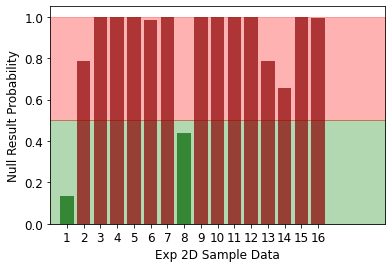

In [12]:
from matplotlib import pyplot as plt
values = 1 - result_prob[:, 1]
indexes = range(1, 17)

plt.rcParams['font.size'] = 12
for idx, val in zip(indexes, values):
    color = 'darkgreen' if val < 0.5 else 'darkred'
    plt.bar(idx, val, color=color, alpha=0.7)

plt.fill_between(range(21), 0, 0.5, color='green', alpha=0.3)
plt.fill_between(range(21), 0.5, 1, color='red', alpha=0.3)
plt.xticks(range(1, 17))
plt.xlabel('Exp 2D Sample Data')
plt.xlim(0, 20)
plt.ylim(0, 1.05)
plt.ylabel('Null Result Probability')
#plt.savefig('Exptrial_results_2d.svg')
plt.show()